In [1]:
from algorithms import *
from algorithms.MlpV2 import *
data = Data()
data.print_shapes()
X_train = data.train_data
y_train = data.train_label

(45000, 128)
(45000, 10)
(5000, 128)
(5000, 10)
(10000, 128)
(10000, 10)


In [2]:
X_test = data.test_data
y_test = data.test_label

In [3]:
batch_size = [64, 128, 256]
learning_rate = [0.001, 0.01, 0.1]
loss = []
train_acc = []
test_acc = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

for batch in batch_size:
    for lr in learning_rate:
        nn = MlpV2(learning_rate=lr, batch_size=batch)
        nn.set_optimiser(opt_type='Momentum', params = [0.9])
        nn.set_batchNormalizer()
        nn.add_layer(128,512,"relu",1)
        nn.add_layer(512,256,"relu",1)
        nn.add_layer(256,128,"relu",1)
        nn.add_layer(128,64,"relu",1)
        nn.add_layer(64,10,"softmax",1)
    
        train_loss = nn.fit(X_train, y_train, epochs=50)
        loss.append(train_loss)
    
        acc = nn.evaluate(X_train, y_train)
        train_acc.append(acc)
    
        t_acc = nn.evaluate(X_test, y_test)
        test_acc.append(t_acc)
        
        y_pred_train = np.argmax(nn.predict(X_train), axis=1)
        y_train_transformed = np.argmax(y_train, axis=1)
        y_pred_test = np.argmax(nn.predict(X_test), axis=1)
        y_test_transformed = np.argmax(y_test, axis=1)
        
        precision = precision_score(y_train_transformed, y_pred_train, average='macro')
        recall = recall_score(y_train_transformed, y_pred_train, average='macro')
        f1 = f1_score(y_train_transformed, y_pred_train, average='macro')
        
        train_precision.append(precision)
        train_recall.append(recall)
        train_f1.append(f1)
        
        t_precision = precision_score(y_test_transformed, y_pred_test, average='macro')
        t_recall = recall_score(y_test_transformed, y_pred_test, average='macro')
        t_f1 = f1_score(y_test_transformed, y_pred_test, average='macro')
        
        test_precision.append(t_precision)
        test_recall.append(t_recall)
        test_f1.append(t_f1)

Epoch: 1  Training Loss: 2.3510795503217286  Time (sec): 4.535580635070801
Epoch: 2  Training Loss: 2.0501608173170083  Time (sec): 4.29125452041626
Epoch: 3  Training Loss: 1.9349599111021074  Time (sec): 4.266881227493286
Epoch: 4  Training Loss: 1.8682100027146036  Time (sec): 4.280132532119751
Epoch: 5  Training Loss: 1.822539940335193  Time (sec): 4.301002264022827
Epoch: 6  Training Loss: 1.785481981854619  Time (sec): 4.301231622695923
Epoch: 7  Training Loss: 1.7574251037851414  Time (sec): 4.361912727355957
Epoch: 8  Training Loss: 1.732721924936106  Time (sec): 4.32552170753479
Epoch: 9  Training Loss: 1.7122107354970242  Time (sec): 4.350207090377808
Epoch: 10  Training Loss: 1.6933679159187323  Time (sec): 4.284131288528442
Epoch: 11  Training Loss: 1.6750586881714724  Time (sec): 4.325819492340088
Epoch: 12  Training Loss: 1.6625439504895754  Time (sec): 4.364819049835205
Epoch: 13  Training Loss: 1.6471981573117676  Time (sec): 4.301699876785278
Epoch: 14  Training Loss: 

C:\Users\James\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\James\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1  Training Loss: 1.7192399145226593  Time (sec): 4.456568956375122
Epoch: 2  Training Loss: 1.957813575445086  Time (sec): 4.3780176639556885
Epoch: 3  Training Loss: 2.353840009831402  Time (sec): 4.393789291381836
Epoch: 4  Training Loss: 2.1976517660463983  Time (sec): 4.411425352096558
Epoch: 5  Training Loss: 2.160274234875338  Time (sec): 4.386586904525757
Epoch: 6  Training Loss: 2.246312218989995  Time (sec): 4.459660053253174
Epoch: 7  Training Loss: 2.139394659373629  Time (sec): 4.394095420837402
Epoch: 8  Training Loss: 2.0089548458875255  Time (sec): 4.455193281173706
Epoch: 9  Training Loss: 1.9399745372506798  Time (sec): 4.350359916687012
Epoch: 10  Training Loss: 1.884322932509166  Time (sec): 4.49639892578125
Epoch: 11  Training Loss: 1.8396964571794459  Time (sec): 4.477580547332764
Epoch: 12  Training Loss: 1.854775146126101  Time (sec): 4.455952405929565
Epoch: 13  Training Loss: 1.836065100780699  Time (sec): 4.4436423778533936
Epoch: 14  Training Loss: 1.

Epoch: 10  Training Loss: 1.396213569094179  Time (sec): 4.221800088882446
Epoch: 11  Training Loss: 1.3762832112514343  Time (sec): 4.482535123825073
Epoch: 12  Training Loss: 1.3536184266503806  Time (sec): 4.833187580108643
Epoch: 13  Training Loss: 1.3389146834439456  Time (sec): 5.669100999832153
Epoch: 14  Training Loss: 1.328844627856685  Time (sec): 5.787726879119873
Epoch: 15  Training Loss: 1.318483501776318  Time (sec): 5.391658544540405
Epoch: 16  Training Loss: 1.3089899322599872  Time (sec): 4.554228067398071
Epoch: 17  Training Loss: 1.2999512428171165  Time (sec): 4.647995948791504
Epoch: 18  Training Loss: 1.2911805952149733  Time (sec): 4.461358547210693
Epoch: 19  Training Loss: 1.282157658973847  Time (sec): 4.579968452453613
Epoch: 20  Training Loss: 1.2749190936378223  Time (sec): 4.635146379470825
Epoch: 21  Training Loss: 1.2708901377362707  Time (sec): 4.639481544494629
Epoch: 22  Training Loss: 1.2680229796508002  Time (sec): 4.490313291549683
Epoch: 23  Train

Epoch: 19  Training Loss: 1.7677734193089765  Time (sec): 4.2051732540130615
Epoch: 20  Training Loss: 1.7566002669566378  Time (sec): 4.215693712234497
Epoch: 21  Training Loss: 1.7475986830690187  Time (sec): 4.200560569763184
Epoch: 22  Training Loss: 1.7393060927651185  Time (sec): 4.289092540740967
Epoch: 23  Training Loss: 1.7308634632343323  Time (sec): 4.394021511077881
Epoch: 24  Training Loss: 1.7240207724226368  Time (sec): 4.260159254074097
Epoch: 25  Training Loss: 1.7163487062721772  Time (sec): 4.252934694290161
Epoch: 26  Training Loss: 1.7099168899105552  Time (sec): 4.351747512817383
Epoch: 27  Training Loss: 1.7028251327152066  Time (sec): 4.2692577838897705
Epoch: 28  Training Loss: 1.6963977197840303  Time (sec): 5.119977951049805
Epoch: 29  Training Loss: 1.6922806171576843  Time (sec): 4.563854217529297
Epoch: 30  Training Loss: 1.6840140820814746  Time (sec): 4.187566757202148
Epoch: 31  Training Loss: 1.679367750222878  Time (sec): 4.308987617492676
Epoch: 32  

Epoch: 28  Training Loss: 1.4929166020065294  Time (sec): 4.240161418914795
Epoch: 29  Training Loss: 1.492732237348699  Time (sec): 4.114300727844238
Epoch: 30  Training Loss: 1.4912577414837993  Time (sec): 4.185185194015503
Epoch: 31  Training Loss: 1.4930177268425573  Time (sec): 4.30919075012207
Epoch: 32  Training Loss: 1.4983378123546178  Time (sec): 4.269066572189331
Epoch: 33  Training Loss: 1.490511244062703  Time (sec): 4.260119915008545
Epoch: 34  Training Loss: 1.4898602324545793  Time (sec): 4.243235349655151
Epoch: 35  Training Loss: 1.4967155451362117  Time (sec): 4.239622592926025
Epoch: 36  Training Loss: 1.4892086047400537  Time (sec): 4.2218403816223145
Epoch: 37  Training Loss: 1.4967943476286407  Time (sec): 4.276886224746704
Epoch: 38  Training Loss: 1.496856505549626  Time (sec): 4.163132429122925
Epoch: 39  Training Loss: 1.4927904688825537  Time (sec): 4.282624244689941
Epoch: 40  Training Loss: 1.4995968980648184  Time (sec): 4.295226812362671
Epoch: 41  Trai

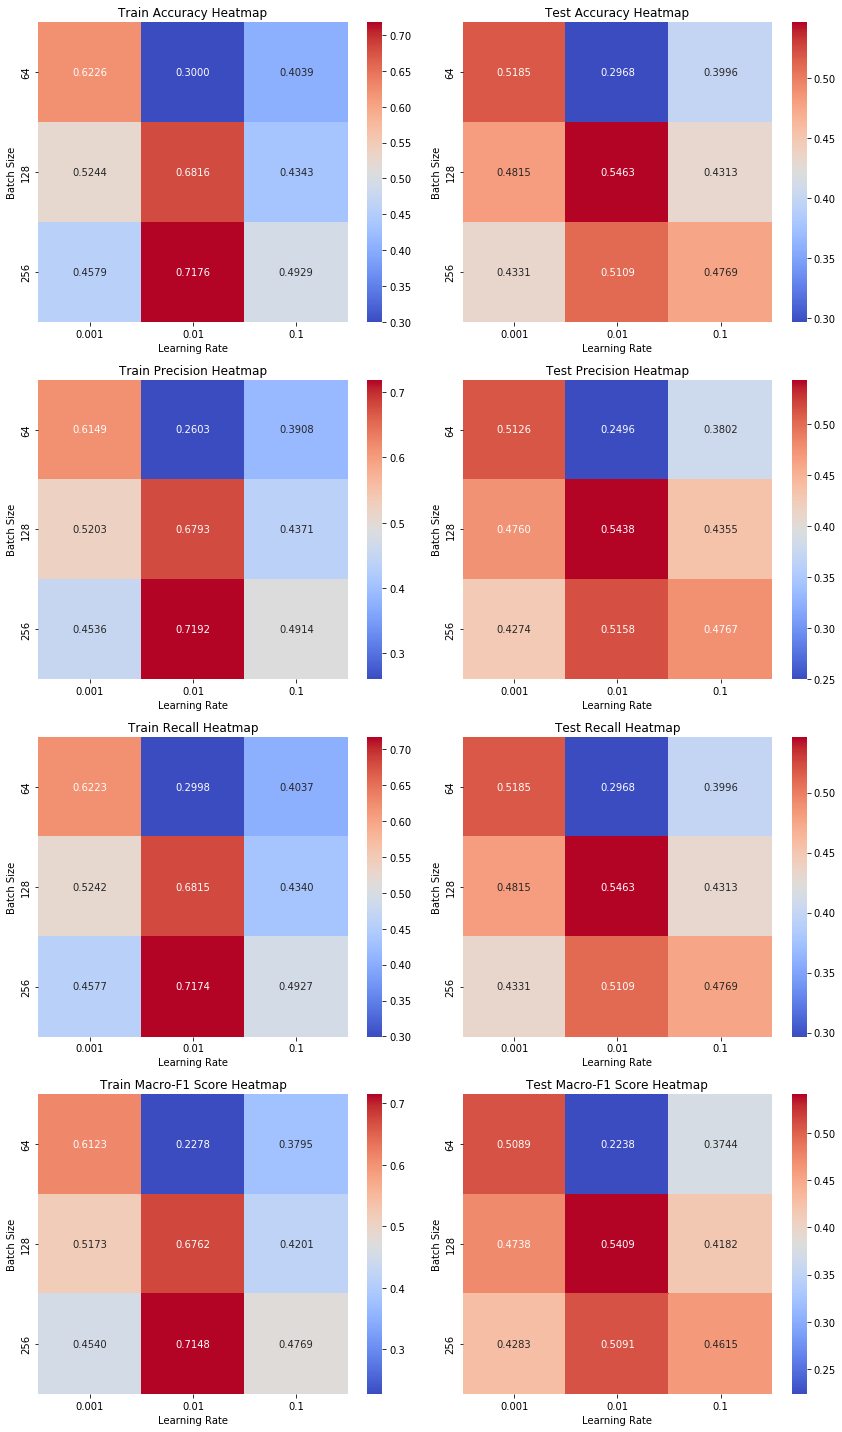

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_accuracy = np.reshape(train_acc, (len(batch_size), len(learning_rate)))
test_accuracy = np.reshape(test_acc, (len(batch_size), len(learning_rate)))
train_precision = np.reshape(train_precision, (len(batch_size), len(learning_rate)))
test_precision = np.reshape(test_precision, (len(batch_size), len(learning_rate)))
train_recall = np.reshape(train_recall, (len(batch_size), len(learning_rate)))
test_recall = np.reshape(test_recall, (len(batch_size), len(learning_rate)))
train_f1 = np.reshape(train_f1, (len(batch_size), len(learning_rate)))
test_f1 = np.reshape(test_f1, (len(batch_size), len(learning_rate)))


def plot_heatmap(ax, data, metric_name, cmap='coolwarm'):
    df = pd.DataFrame(data, index=batch_size, columns=learning_rate)
    sns.heatmap(df, annot=True, fmt='.4f', cmap=cmap, ax=ax)
    ax.set_title(f'{metric_name} Heatmap')
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Batch Size')

fig, axes = plt.subplots(4, 2, figsize=(12, 20))
metrics = [
    ('Train Accuracy', train_accuracy),
    ('Test Accuracy', test_accuracy),
    ('Train Precision', train_precision),
    ('Test Precision', test_precision),
    ('Train Recall', train_recall),
    ('Test Recall', test_recall),
    ('Train Macro-F1 Score', train_f1),
    ('Test Macro-F1 Score', test_f1)
]

for i, (metric_name, data) in enumerate(metrics):
    row, col = divmod(i, 2)
    plot_heatmap(axes[row, col], data, metric_name)

plt.tight_layout()
#plt.savefig('visual_outputs/combined_heatmap.png')
plt.show()

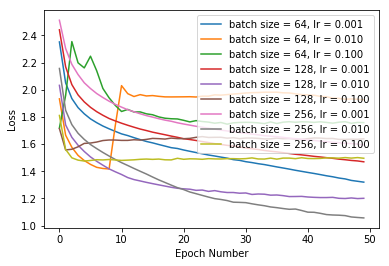

In [9]:
index = 0
for i in range(len(batch_size)):
    for j in range(len(learning_rate)):
        plt.plot(loss[index],label=f'batch size = {batch_size[i]:.0f}, lr = {learning_rate[j]:.3f}')
        index += 1
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
#plt.savefig('visual_outputs/batch_lr_loss.png')
plt.show()